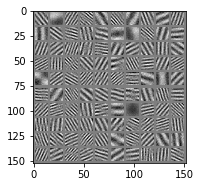

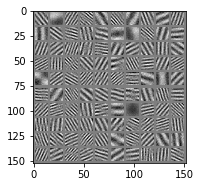

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import sys
sys.path.insert(0, './')
from gatedAutoencoder import FactoredGatedAutoencoder
from utils import plot_mats

X = np.load('./shiftsuniform_x.npy').astype('float32')
Y = np.load('./shiftsuniform_y.npy').astype('float32')

model = FactoredGatedAutoencoder(
    numFactors=100, 
    numHidden=25,
    corrutionLevel=0.5)


model.train(X,Y, epochs=300, print_debug=False)
model.save('test')


# =====================================
# visualizing
# =====================================

# function copied from the original code
def dispims(M, height, width, border=0, bordercolor=0.0, layout=None, **kwargs):
    from pylab import cm, ceil
    numimages = M.shape[1]
    if layout is None:
        n0 = int(np.ceil(np.sqrt(numimages)))
        n1 = int(np.ceil(np.sqrt(numimages)))
    else:
        n0, n1 = layout
    im = bordercolor * np.ones(((height+border)*n0+border,(width+border)*n1+border),dtype='<f8')
    for i in range(n0):
        for j in range(n1):
            if i*n1+j < M.shape[1]:
                im[i*(height+border)+border:(i+1)*(height+border)+border,
                   j*(width+border)+border :(j+1)*(width+border)+border] = np.vstack((
                            np.hstack((np.reshape(M[:,i*n1+j],(height, width)),
                                   bordercolor*np.ones((height,border),dtype=float))),
                            bordercolor*np.ones((border,width+border),dtype=float)
                            ))
    pylab.imshow(im, cmap=cm.gray, interpolation='nearest', **kwargs)
    pylab.show()

    
pylab.subplot(1, 2, 1)
dispims(model.Wxf_np, 13, 13, 2)
pylab.subplot(1, 2, 2)
dispims(model.Wyf_np, 13, 13, 2)